<a href="https://colab.research.google.com/github/yachika-yashu/yachika-yashu/blob/main/EDA%20project%201/Insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link for the dataset: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load the Dataset

In [5]:
df = pd.read_csv('insurance_data.csv')


Step 3: Understand the Data

In [6]:
# Display the first few rows
print(df.head())

# Get the shape of the dataset
print(df.shape)

# Get information about the dataset
print(df.info())

# Get summary statistics
print(df.describe())

   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  
(1340, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender        

Step 4: Handle Missing Values

In [12]:
print(df.isnull().sum())
#since age and region contains null values, age can be filled with mean(average and region can be filled with mode (most frequently occuring value)
#fill in place to override original file
df['age']=df['age'].fillna(df['age'].mean())
df['region']=df['region'].fillna(df['region'].mode()[0])

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


Step 5: Handle Duplicate Values

In [13]:
df.isnull().sum()

,0
index,0
PatientID,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


In [ ]:
print(df.duplicated.sum())

Step 6: Modify/add/insert columns

In [47]:
df.columns
del df['index']

In [48]:
def bmi_category(n):
  if n < 18.5:
    return 'Underweight'
  elif 18.5 <= n < 25:
    return 'Normal weight'
  elif 25 <= n < 30:
    return 'Overweight'
  else:
    return 'Obesity'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category,bloodpressure_rate
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87,Normal weight,normal
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51,Obesity,normal
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94,Obesity,normal
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40,Obesity,normal
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01,Obesity,normal


Step 7: See value counts of categorical columns and adjust columns data

In [49]:
Categorical_fea = df.select_dtypes(include=np.object_).columns
print(Categorical_fea)
for i in Categorical_fea:
  print(df[i].value_counts())


Index(['gender', 'diabetic', 'smoker', 'region', 'bmi_category',
       'bloodpressure_rate'],
      dtype='object')
gender
male      678
female    662
Name: count, dtype: int64
diabetic
No     698
Yes    642
Name: count, dtype: int64
smoker
No     1066
Yes     274
Name: count, dtype: int64
region
southeast    446
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64
bmi_category
Obesity          708
Overweight       389
Normal weight    223
Underweight       20
Name: count, dtype: int64
bloodpressure_rate
normal        1281
elevated        30
hbp-stage1      24
hbp-stage2       5
Name: count, dtype: int64


Step 8: Data Visualization

<Axes: xlabel='bmi_category', ylabel='Count'>

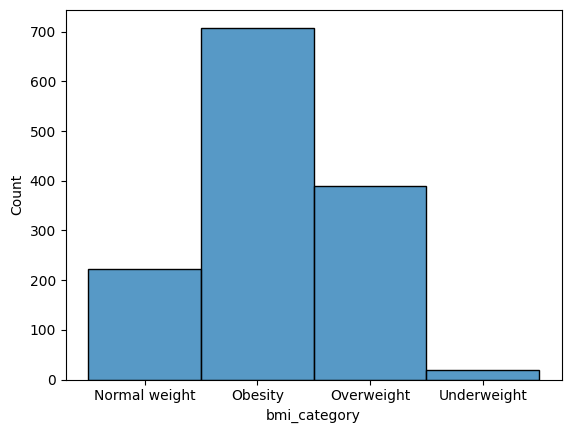

In [50]:
#1. Plot bmi_category
sns.histplot(df['bmi_category'])



<Axes: ylabel='count'>

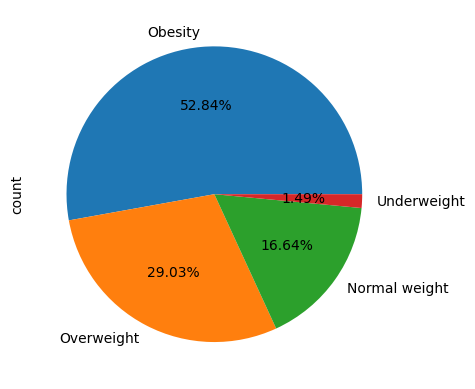

In [51]:
df['bmi_category'].value_counts().plot(kind='pie',autopct = '%1.2f%%')


<Axes: xlabel='bmi_category', ylabel='claim'>

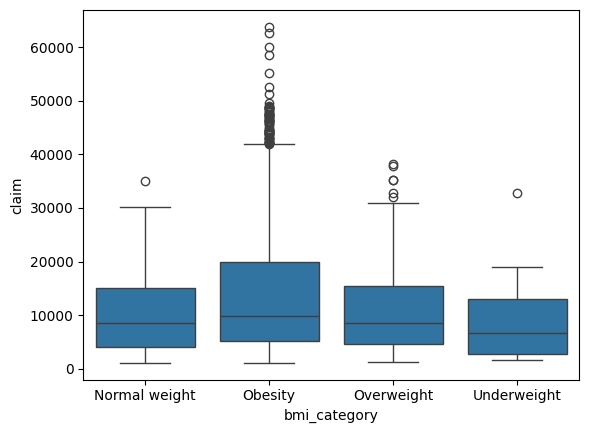

In [52]:
#bmi categories vs claim box plot
sns.boxplot(data=df,x='bmi_category',y='claim')

<Axes: xlabel='bmi_category', ylabel='claim'>

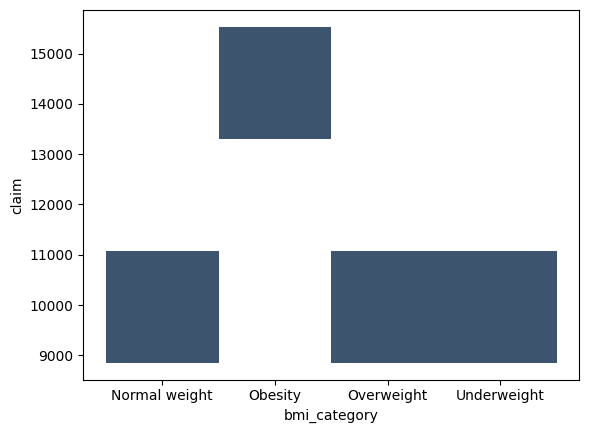

In [28]:

#histogram plot of bmi category vs claim mean
sns.histplot(data = df.groupby('bmi_category')['claim'].mean().reset_index(), x='bmi_category',y='claim')

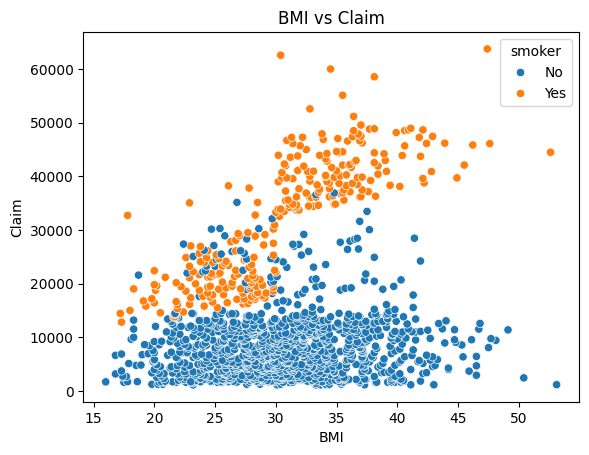

In [53]:
#relationship between BMI and insurance claims for smokers and non-smokers
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker')
plt.title('BMI vs Claim')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

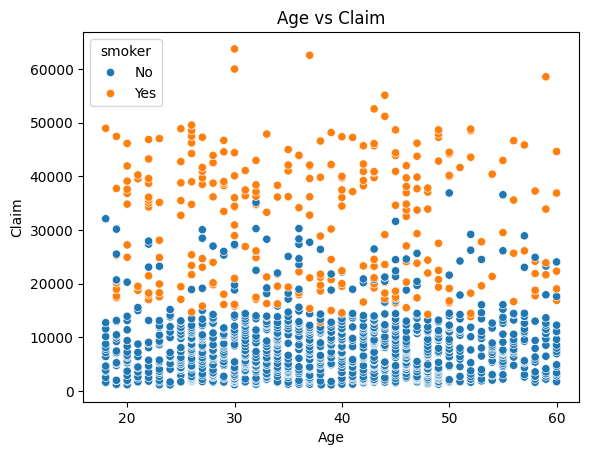

In [54]:
#relationship between age and insurance claims for smokers and non-smokers
sns.scatterplot(data=df, x='age', y='claim', hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()

Text(0, 0.5, 'Claim')

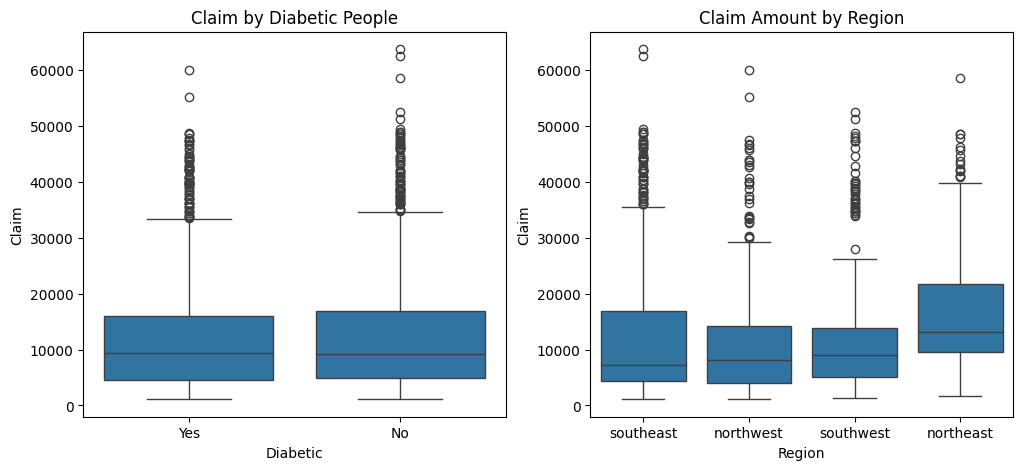

In [55]:
#relationship between diabetic and insurance claims
#relationship between region and insurance claims
fig , ax = plt.subplots(1,2,figsize=(12,5))

sns.boxplot(data=df, x='diabetic', y='claim',ax=ax[0])
ax[0].set_title('Claim by Diabetic People')
ax[0].set_xlabel('Diabetic')
ax[0].set_ylabel('Claim')


sns.boxplot(data=df, x='region', y='claim',ax=ax[1])
ax[1].set_title('Claim Amount by Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Claim')

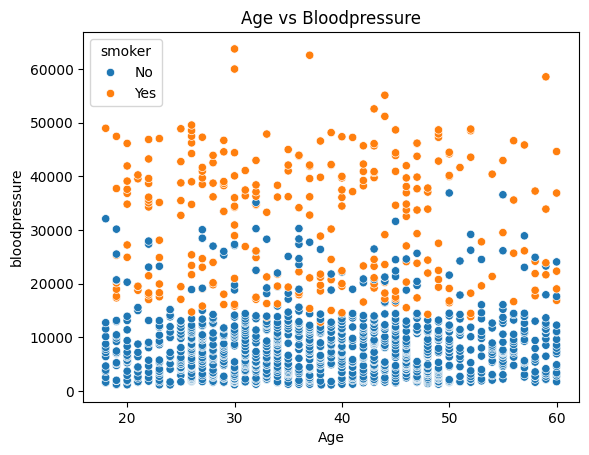

In [56]:
#relationship between age and blood pressure for smokers and non-smokers
sns.scatterplot(data=df, x='age', y='claim', hue='smoker')
plt.title('Age vs Bloodpressure')
plt.xlabel('Age')
plt.ylabel('bloodpressure')
plt.show()

In [57]:
def bloodpressure_rate(n):

    if n < 120:
        return "normal"
    elif 120 <= n < 130:
        return "elevated"
    elif 130 <= n < 140:
        return "hbp-stage1"
    elif 140 <= n < 180:
        return "hbp-stage2"
    elif n >= 180:
        return "hypertensive_crisis"
    else:
        return "Invalid Value"

df['bloodpressure_rate'] = df['bloodpressure'].apply(bloodpressure_rate)

<Axes: xlabel='bloodpressure_rate', ylabel='claim'>

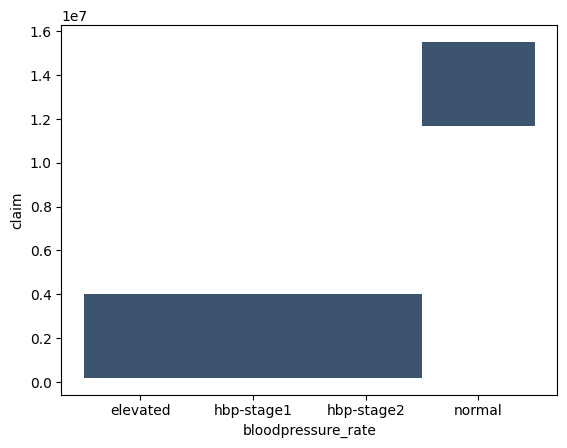

In [58]:
#relationship between bloodpressure_rate and insurance claims for smokers and non-smokers

sns.histplot(data = df.groupby('bloodpressure_rate')['claim'].sum().reset_index(), x='bloodpressure_rate',y='claim')

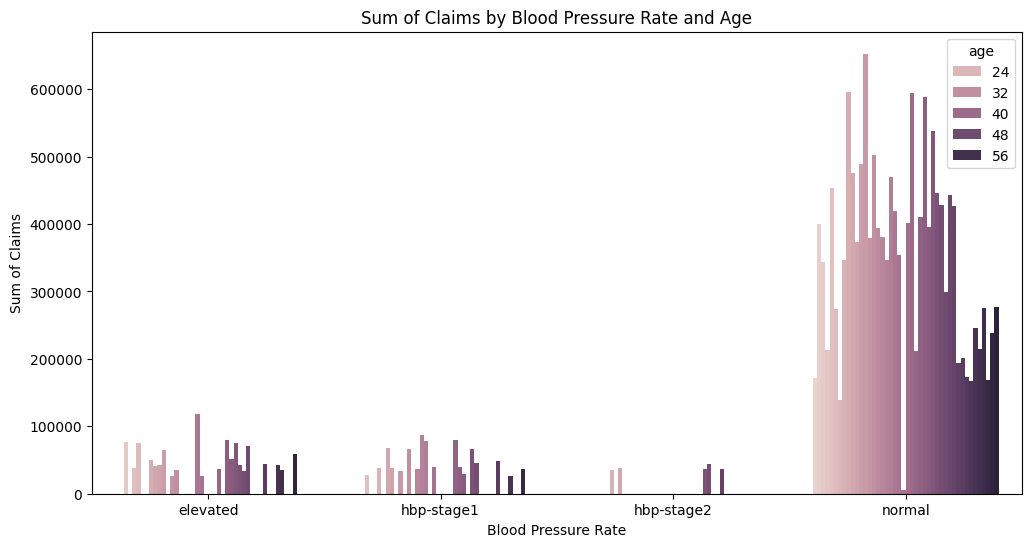

In [59]:
#relationship between bloodpressure_rate and insurance claims for smokers and non-smokers

plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby(['bloodpressure_rate', 'age'])['claim'].sum().reset_index(), x='bloodpressure_rate', y='claim', hue='age')
plt.title('Sum of Claims by Blood Pressure Rate and Age')
plt.xlabel('Blood Pressure Rate')
plt.ylabel('Sum of Claims')
plt.show()

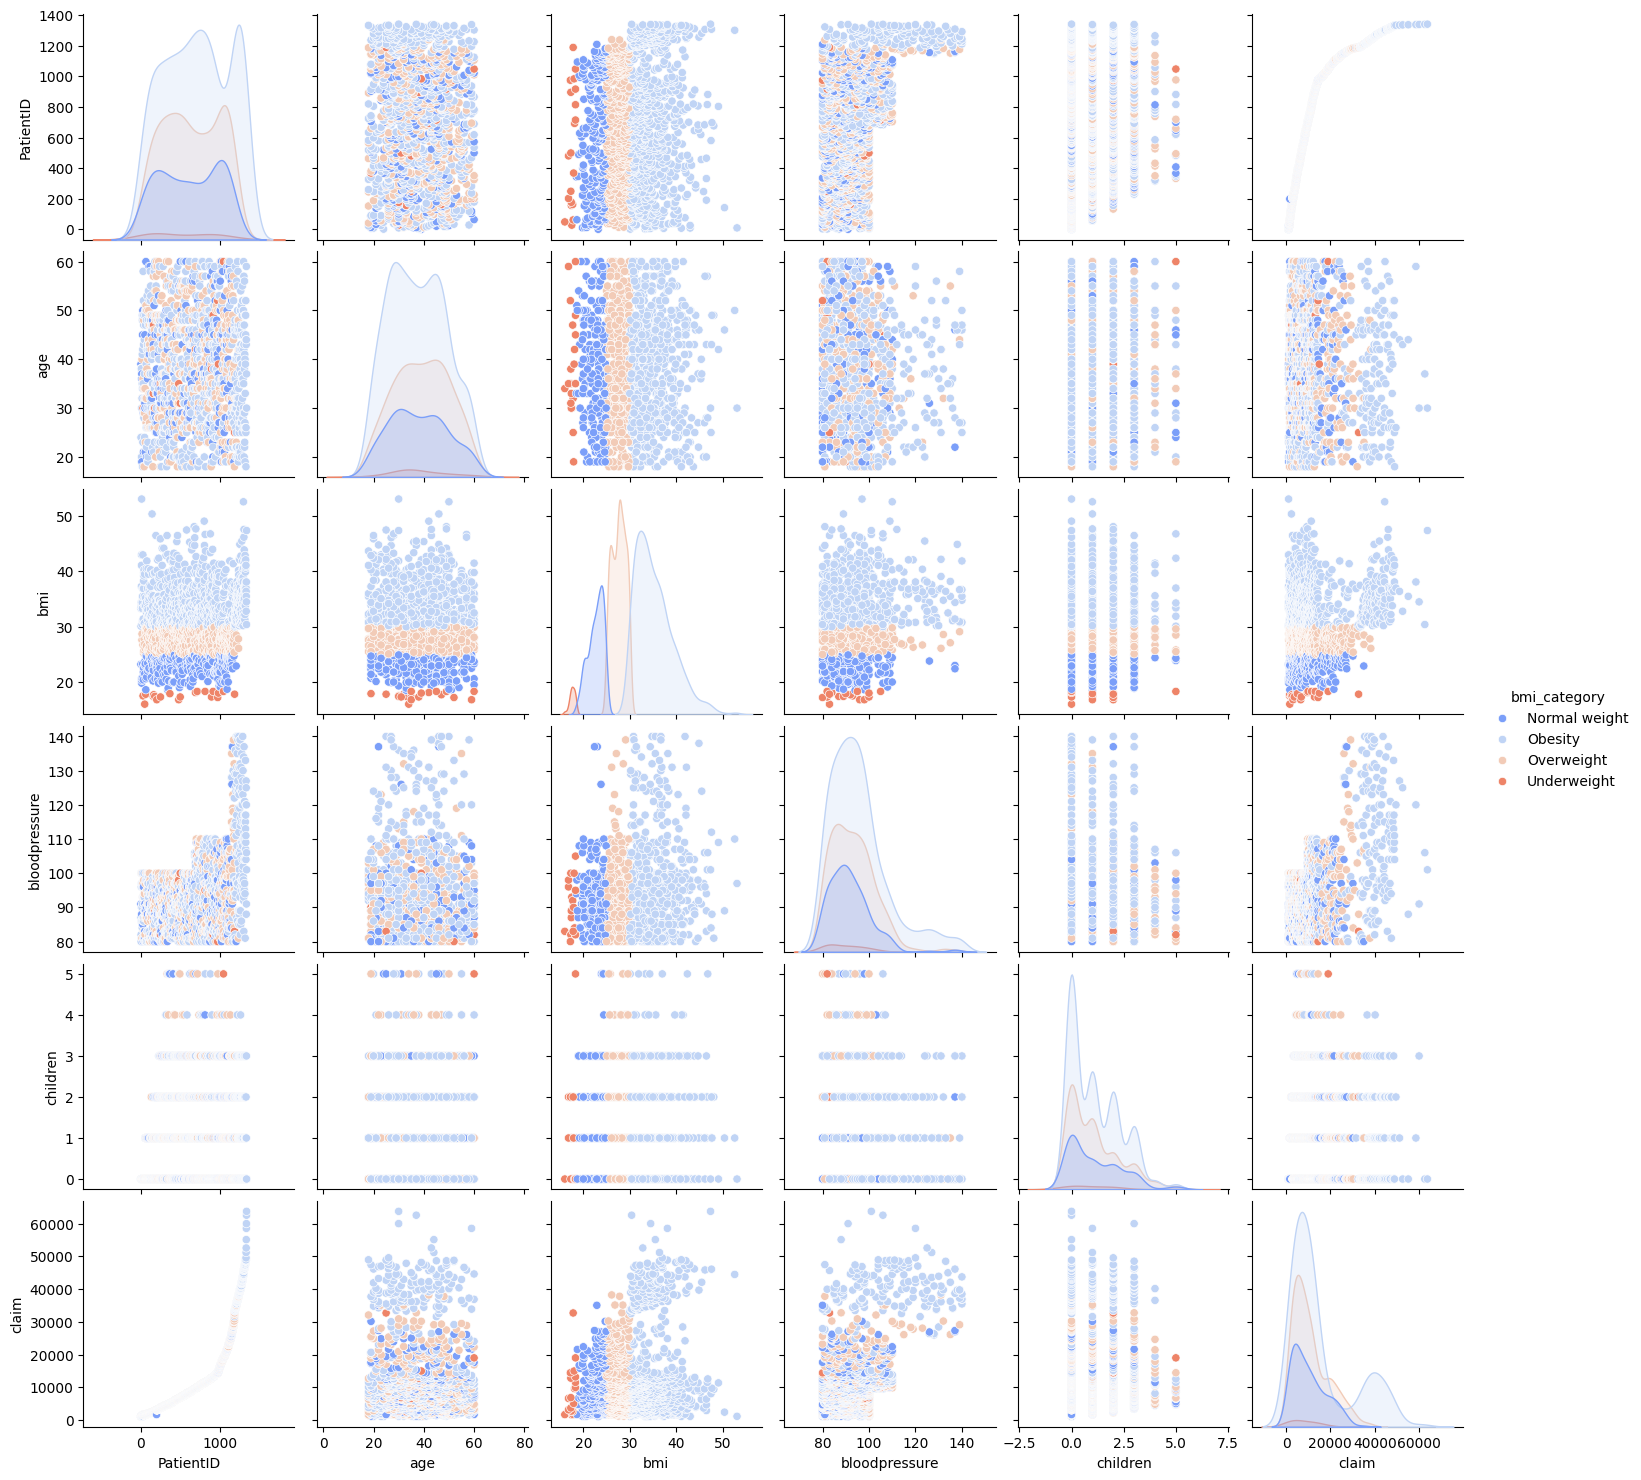

In [60]:
sns.pairplot(data=df, hue='bmi_category', palette='coolwarm')

In [72]:
numerical_fea = df.select_dtypes(include=np.number).columns
correlation_matrix=df[numerical_fea].corr()
print(correlation_matrix)

               PatientID       age       bmi  bloodpressure  children  \
PatientID       1.000000 -0.007450  0.115129       0.450602  0.128104   
age            -0.007450  1.000000 -0.041919      -0.060247 -0.025507   
bmi             0.115129 -0.041919  1.000000       0.143544  0.012092   
bloodpressure   0.450602 -0.060247  0.143544       1.000000 -0.031682   
children        0.128104 -0.025507  0.012092      -0.031682  1.000000   
claim           0.879268 -0.027856  0.197401       0.531341  0.069233   

                  claim  
PatientID      0.879268  
age           -0.027856  
bmi            0.197401  
bloodpressure  0.531341  
children       0.069233  
claim          1.000000  


<Axes: >

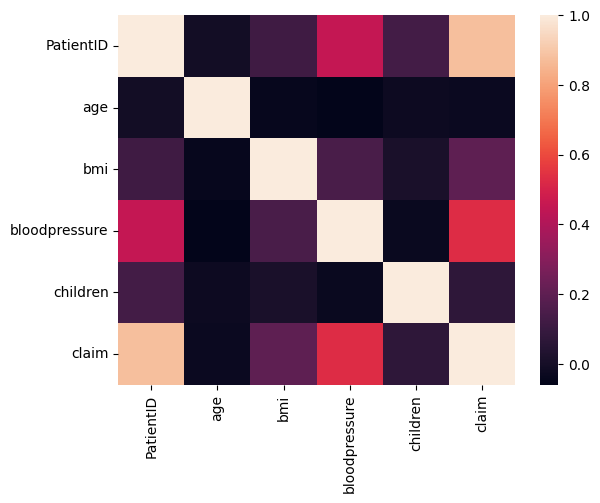

In [69]:
sns.heatmap(correlation_matrix)


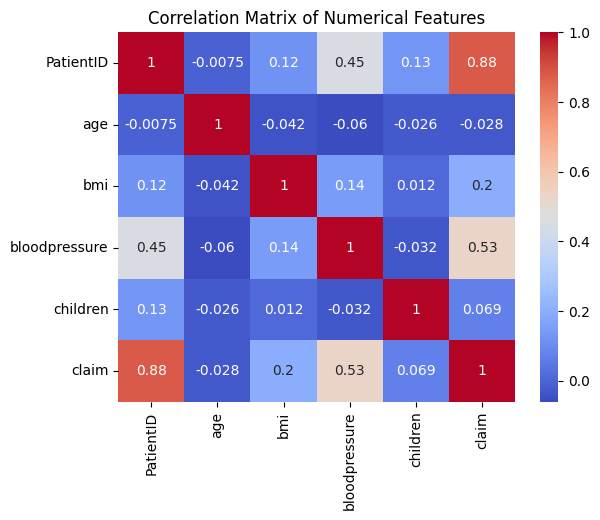

In [68]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Axes: xlabel='claim', ylabel='Count'>

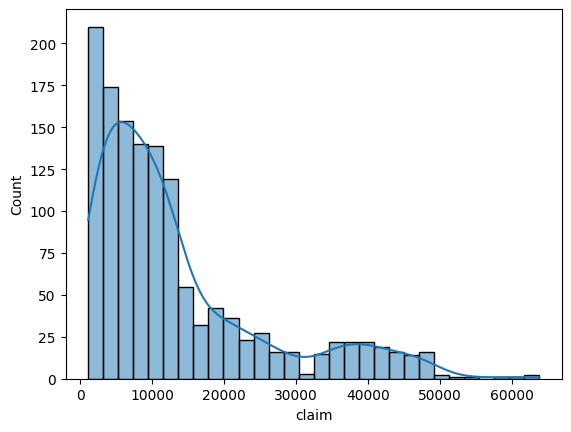

In [75]:
sns.histplot(df['claim'],kde=True)